<a href="https://colab.research.google.com/github/lakshmiprasanth9222/lakshmiprasanth9222/blob/main/FINAL_CODE_CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

### DOMAIN : FINANCE AND INSURANCE
    
<b>DONE BY : <br>William Johnson
<br>Neha Johnson
<br>Akshaya CV
<br>Leann Davis
<br>Sulala Saleem P
<br>Lakshmi prasanth

### **Objective : The key objective of any credit card fraud detection system is to identify suspicious events and report them to an analyst while letting normal transactions be automatically processed**

# Importing the libraries

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the Data-set

In [ ]:
# Reading dataset

data=pd.read_csv('credit_card.csv')

In [ ]:
# Displaying first few rows

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# 1. DATA UNDERSTANDING

### Data information

In [ ]:
# Concise summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284418 non-null  float64
 4   V4      284418 non-null  float64
 5   V5      284418 non-null  float64
 6   V6      284418 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     283953 non-null  float64
 14  V14     283953 non-null  float64
 15  V15     283953 non-null  float64
 16  V16     283953 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking for null values

data.isnull().sum()

Time        0
V1          0
V2          0
V3        389
V4        389
V5        389
V6        389
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13       854
V14       854
V15       854
V16       854
V17         0
V18         0
V19         0
V20         0
V21         0
V22         0
V23         0
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class     244
dtype: int64

**Observation** : <br>
It is observed that there are null values present in the datset

In [ ]:
# Checking the shape of the dataset

data.shape

(284807, 31)

**Observation** : <br>
It is observed that there are 284807 rows and 31 columns

In [ ]:
# Statistical summary of dataset

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,284418.000000,284418.000000,284418.000000,284418.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284563.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,0.000937,0.000335,-0.000330,0.000028,0.000260,-0.000375,0.000252,...,-0.000098,0.000094,0.000061,0.000043,-0.000086,-0.000032,0.000008,0.063870,88.285748,0.001729
std,47488.145955,1.958696e+00,1.651309e+00,1.516295,1.415815,1.380434,1.332074,1.236988,1.194468,1.098494,...,0.734595,0.725610,0.624545,0.605571,0.521301,0.482066,0.403615,5.114061,250.090588,0.041545
min,0.000000,-5.640751e+01,-7.271573e+01,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-0.889041,-0.848412,-0.691832,-0.768080,-0.553621,-0.208968,-0.642697,...,-0.228509,-0.541975,-0.161881,-0.354470,-0.317257,-0.326854,-0.070824,-0.052931,5.510000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,0.180931,-0.019425,-0.054593,-0.273691,0.040244,0.022190,-0.051239,...,-0.029441,0.006775,-0.011112,0.040985,0.016341,-0.051824,0.001401,0.011292,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027881,0.743942,0.611520,0.398572,0.570490,0.327306,0.597341,...,0.186474,0.528403,0.147875,0.439530,0.350634,0.240707,0.091042,0.078591,77.045000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,1126.960000,25691.160000,1.000000


In [ ]:
# Displaying column names

data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Observation** : <br>
So these are the columns in the dataset

### <b>FRAUD CASES AND GENUINE CASES

In [ ]:
# Checking the number of fraud cases

fraud_cases=len(data[data['Class']==1])

In [ ]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [ ]:
# Checking the number of non-fraud cases

non_fraud_cases=len(data[data['Class']==0])

In [ ]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284071


**Observation** : <br>
So there are 492 fraud cases and 284071 non fraud cases

# Exploratory data analysis

### Univariate Analysis

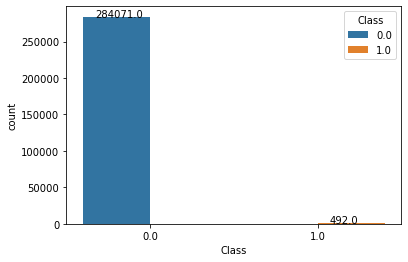

In [ ]:
# Using barplot to check the number of fraudulent and non-fraudulent cases

fig = sns.countplot(x=data.Class, hue=data.Class)

for p in fig.patches:
    fig.annotate(p.get_height() , (p.get_x()+0.07, p.get_height()-40))

**Observation** :<br>
So from this countplot it is observed that the data is highly imbalanced. Only 492 out of 284807 are fraud.

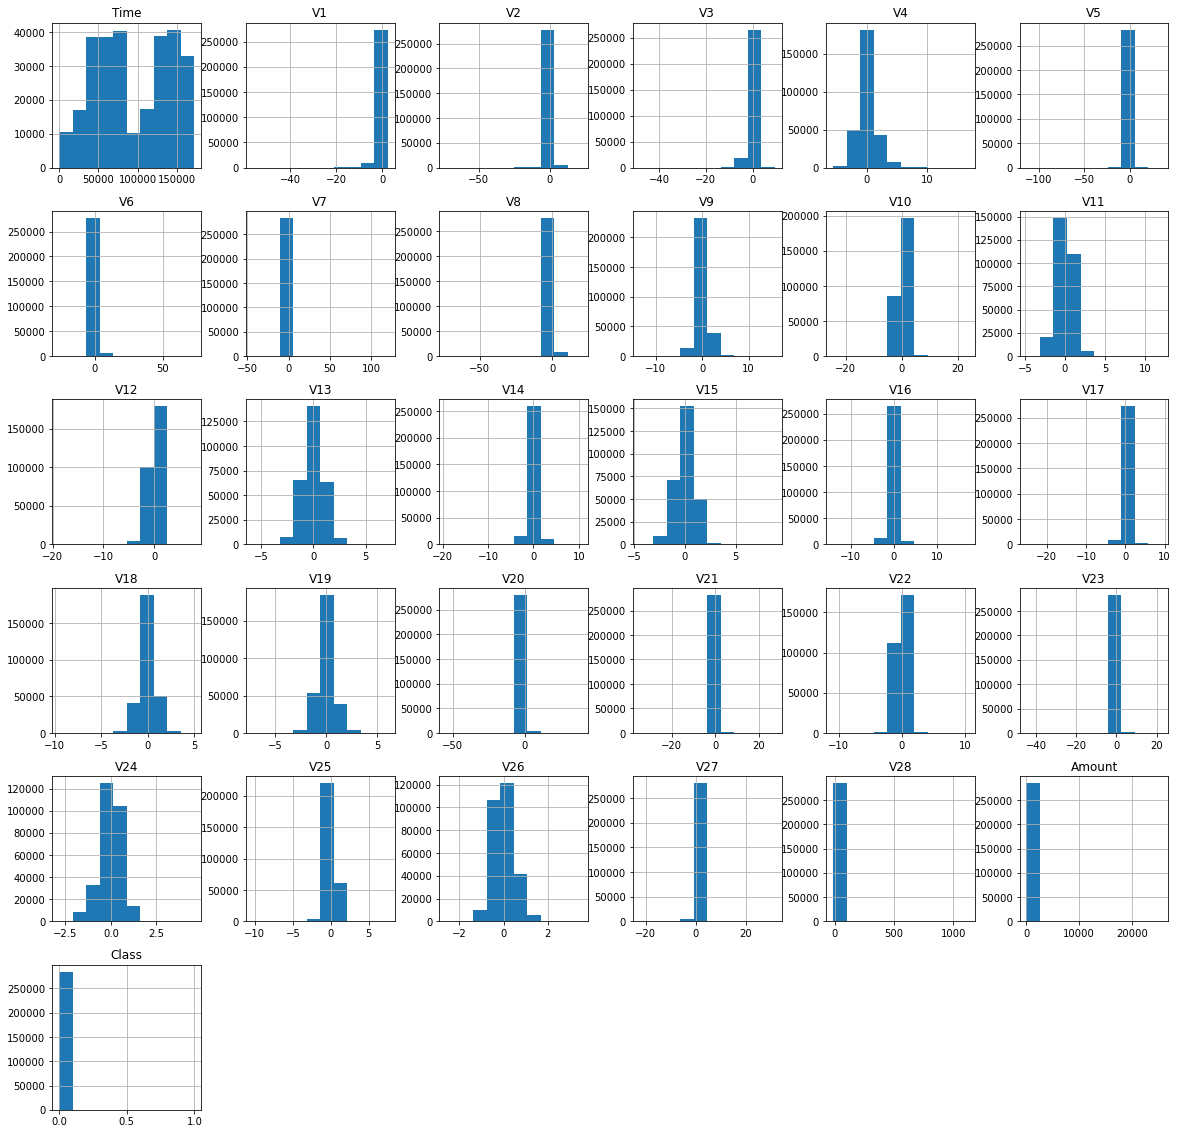

In [ ]:
# Using histplots to check the distribution of the dataset

data.hist(figsize=(20,20))
plt.show()

<b>Observation</b><br>
The values of V1, V2,..., V28 are mostly grouped around 0 values, with some fairly large outliers or no exceptions.In Class the value 1 is very small (fraudulent transaction).

Time        AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
V1        AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
V2        AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
V3        AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
V4        AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
V5        AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
V6        AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
V7          AxesSubplot(0.125,0.677439;0.0945122x0.0920732)
V8        AxesSubplot(0.238415,0.677439;0.0945122x0.0920...
V9        AxesSubplot(0.351829,0.677439;0.0945122x0.0920...
V10       AxesSubplot(0.465244,0.677439;0.0945122x0.0920...
V11       AxesSubplot(0.578659,0.677439;0.0945122x0.0920...
V12       AxesSubplot(0.692073,0.677439;0.0945122x0.0920...
V13       AxesSubplot(0.805488,0.677439;0.0945122x0.0920...
V14         AxesSubplot(0.125,0.566951;0.0945122x0.0920732)
V15       AxesSubplot(0.238415,0.566951;0.0945122x0.0920...
V16       AxesSubplot(0.351829,0.566951;

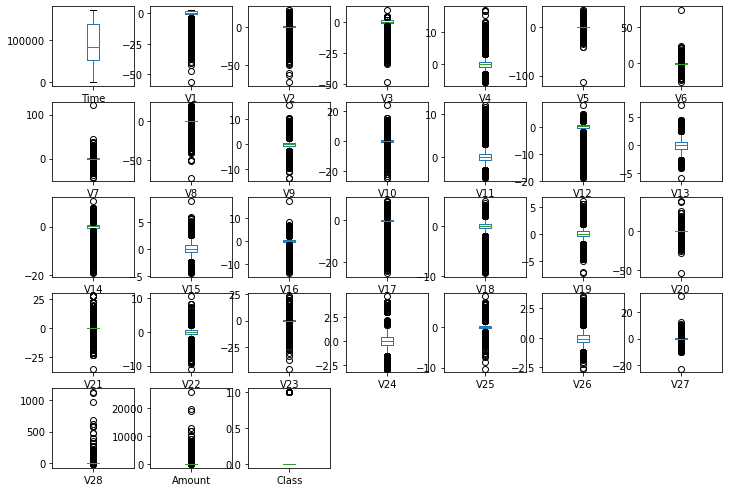

In [ ]:
# Checking for outliers

data.plot(kind='box',subplots=True,figsize=(12,12),layout=(7,7))

**Observation** : <br>
We can see that there are outliers present in almost all the features

In [ ]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

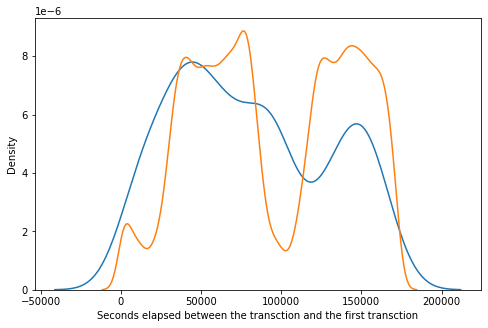

In [ ]:
# Distribution plot

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

<b>Observation</b><br>
There is no specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.

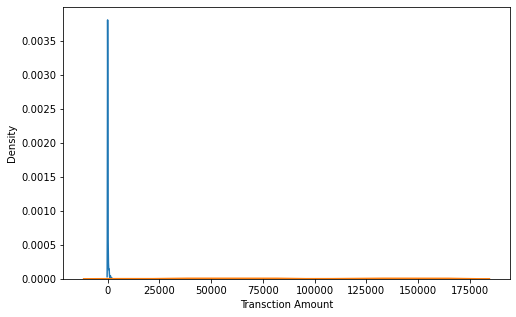

In [ ]:
# Distribution plot

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

<b>Observation</b><br>
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

### <b> Bivariate analysis
    

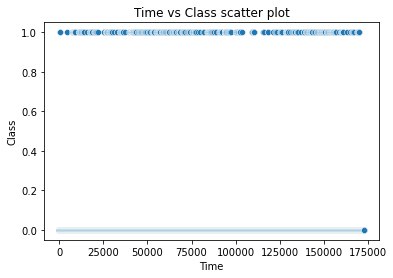

In [ ]:
# Creating a scatter plot to observe the distribution of classes with time

sns.scatterplot(data["Time"], data["Class"])
plt.title("Time vs Class scatter plot")
plt.show()


<b>Observation</b><br>
There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

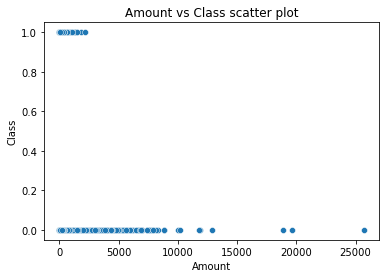

In [ ]:
# Creating a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(data["Amount"], data["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

<b>Observation </b><br>
Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

<AxesSubplot:>

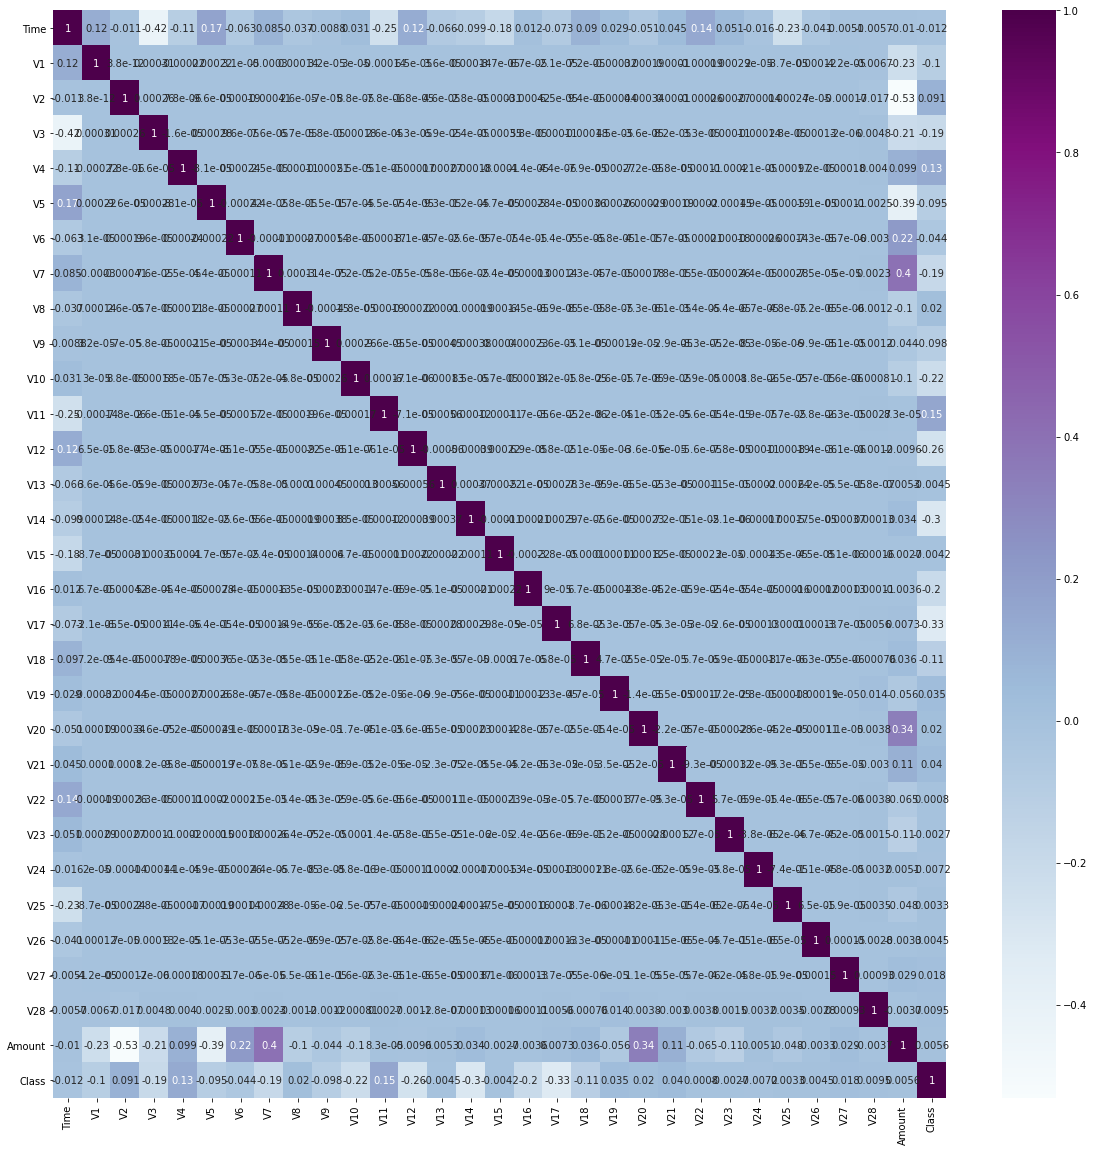

In [ ]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='BuPu',annot=True)

<b>Observation</b><br>
The heat-map above indicates that there are no high correlation values among the predictor columns. No predictor column has a high correlation value with the Class column either. However there exists a negative correlation among V2 and Amount as well as a positive correlation among V7 and the Amount feature.

# 2.DATA PREPROCESSING

#  Checking for missing values

In [ ]:
data.isnull().sum()

Time        0
V1          0
V2          0
V3        389
V4        389
V5        389
V6        389
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13       854
V14       854
V15       854
V16       854
V17         0
V18         0
V19         0
V20         0
V21         0
V22         0
V23         0
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class     244
dtype: int64

So it is observed that there are missing values in column v3,v4,v5,v6t,v13,v14,v15,v16 and class

# Handling misssing values

In [ ]:
# So here we are removing missing by median imputation method
data['V3'].median()

data['V3'].fillna(data['V3'].median(), inplace=True)

data['V4'].median()

data['V4'].fillna(data['V4'].median(), inplace=True)

data['V5'].median()

data['V5'].fillna(data['V5'].median(), inplace=True)

data['V6'].median()

data['V6'].fillna(data['V6'].median(), inplace=True)

data['V13'].median()

data['V13'].fillna(data['V13'].median(), inplace=True)

data['V14'].median()

data['V14'].fillna(data['V14'].median(), inplace=True)

data['V15'].median()

data['V15'].fillna(data['V15'].median(), inplace=True)

data['V16'].median()

data['V16'].fillna(data['V16'].median(), inplace=True)

data['Class'].median()

data['Class'].fillna(data['Class'].median(), inplace=True)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Now all the missing values are removed using median imputation method

In [ ]:
corr_matrix = data.corr()
corr_matrix.Class.sort_values(ascending = False)


Class     1.000000
V11       0.154900
V4        0.133076
V2        0.091289
V21       0.040415
V19       0.034783
V20       0.020095
V8        0.019886
V27       0.017580
Amount    0.005643
V26       0.004460
V25       0.003314
V22       0.000800
V28       0.000096
V23      -0.002689
V15      -0.004233
V13      -0.004541
V24      -0.007225
Time     -0.012323
V6       -0.043509
V5       -0.095007
V9       -0.097754
V1       -0.101347
V18      -0.111482
V7       -0.187281
V3       -0.192643
V16      -0.196156
V10      -0.216859
V12      -0.260565
V14      -0.302153
V17      -0.326442
Name: Class, dtype: float64

#  Outlier Detection



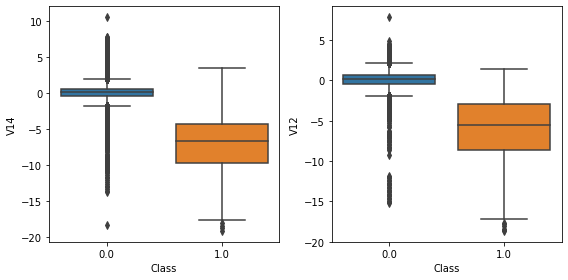

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(x = 'Class', y = 'V14', data = data, ax = ax1)
sns.boxplot(x = 'Class', y = 'V12', data = data, ax = ax2)

plt.tight_layout()

# Outlier removal



In [ ]:
# So here we are removing outlers from V14 AND V12 .Since they are highly correlated to class label
V14_fraud = data['V14'].loc[data['Class'] == 1]

q25, q75 = np.percentile(V14_fraud, 25), np.percentile(V14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {} \n'.format(q25, q75))

V14_iqr = q75 - q25
print('V14 IQR : {}\n'.format(V14_iqr))

cutoff = V14_iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

outliers = [x for x in V14_fraud if x < lower or x > upper]
print('V14 Outliers: {}\n'.format(outliers))
print('No of Outliers for V14: {}\n'.format(len(outliers)))

data = data.drop(data[(data['V14'] > upper) | (data['V14'] < lower)].index)

print('-' * 127)
print()

V12_fraud = data['V12'].loc[data['Class'] == 1]

q25, q75 = np.percentile(V12_fraud, 25), np.percentile(V12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {} \n'.format(q25, q75))

V12_iqr = q75 - q25
print('V12 IQR : {}\n'.format(V12_iqr))

cutoff = V12_iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

outliers = [x for x in V12_fraud if x < lower or x > upper]
print('V12 Outliers: {}\n'.format(outliers))
print('No of Outliers for V12: {}\n'.format(len(outliers)))

data = data.drop(data[(data['V12'] > upper) | (data['V12'] < lower)].index)



Quartile 25: -9.69272296475 | Quartile 75: -4.26358845 

V14 IQR : 5.42913451475

V14 Outliers: [-19.21432549, -18.82208674, -18.49377336, -18.04999769]

No of Outliers for V14: 4

-------------------------------------------------------------------------------------------------------------------------------

Quartile 25: -8.6730332045 | Quartile 75: -2.89303056825 

V12 IQR : 5.78000263625

V12 Outliers: [-18.04759657, -18.68371463, -18.55369701, -18.43113103]

No of Outliers for V12: 4



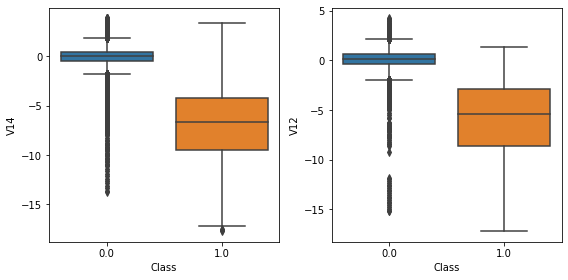

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(x = 'Class', y = 'V14', data = data, ax = ax1)
sns.boxplot(x = 'Class', y = 'V12', data = data, ax = ax2)

plt.tight_layout()



So we have removed outliers from v14 and v12.

# Feature reduction




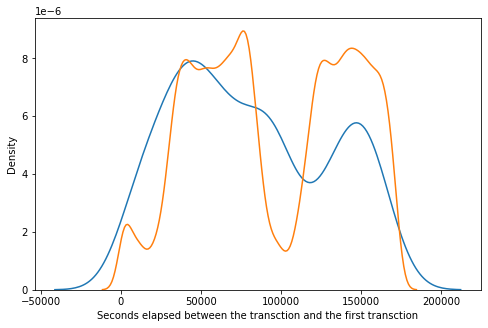

In [ ]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()



There is no specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.So we are dropping the time column



In [ ]:
# Dropping the Time column
data.drop('Time', axis=1, inplace=True)

In [ ]:
data.dtypes.value_counts()

float64    30
dtype: int64

<b>Identifying duplicate rows and removing it</b>

In [ ]:
data.duplicated(keep='first').sum()

9068

It is obsereved that there are 9068 duplicate rows

In [ ]:
data[data.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
113,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
114,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
115,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284708,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,-0.193920,...,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0.0
284751,2.050734,-0.364010,-2.542843,-0.729357,2.388455,3.318015,-0.479138,0.791559,0.403374,0.093232,...,-0.293363,-0.834802,0.381740,0.698179,-0.264798,0.219275,-0.052131,-0.066940,0.89,0.0
284775,1.955547,-0.724606,-1.706511,-0.611145,1.710907,3.914215,-1.248690,1.054133,1.314064,-0.150553,...,0.193605,0.690196,0.155951,0.726775,-0.061219,-0.192666,0.060347,-0.042323,12.99,0.0
284785,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0.0


In [ ]:
data[30:36]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,-0.207358,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0.0
31,1.114009,0.085546,0.493702,1.335760,-0.300189,-0.010754,-0.118760,0.188617,0.205687,0.082262,...,-0.053234,-0.004760,-0.031470,0.198054,0.565007,-0.337718,0.029057,0.004453,4.45,0.0
32,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
34,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0


In [ ]:
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
data.duplicated().sum()

0

The duplicate rows are removed

<b >Train-Test Split</b>



In [ ]:
# Import library
from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = data.drop(['Class'], axis=1)

y = data['Class']

# Balancing the data using undersampling

In [ ]:
from imblearn import under_sampling
from imblearn.under_sampling import NearMiss

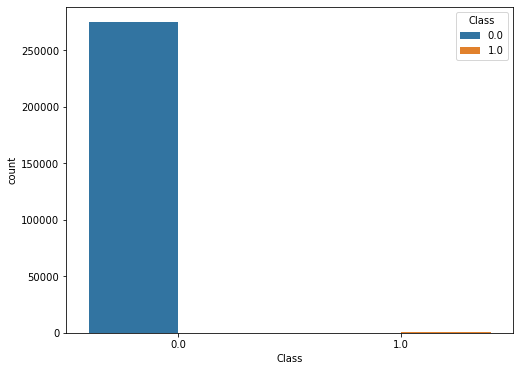

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y,hue=y);

In [ ]:
nm=NearMiss()
X_1,y_1=nm.fit_resample(X,y)

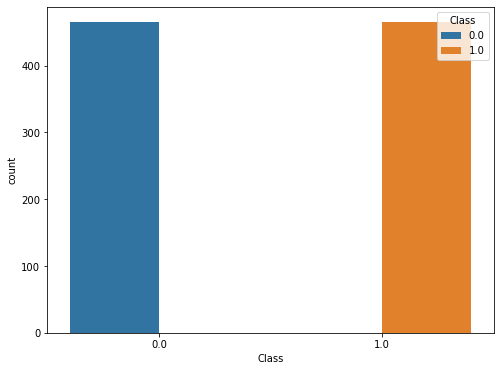

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y_1,hue=y_1);

In [ ]:
print('shape of X_1:',X_1.shape)
print('shape of y_1:',y_1.shape)

shape of X_1: (930, 29)
shape of y_1: (930,)


In [ ]:
balanced_data=pd.concat([X_1, y_1], axis=1)

In [ ]:
balanced_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176665,0.552100,-0.492232,0.757094,0.243043,-0.783510,0.224076,-0.036926,-0.421679,-0.583755,...,-0.062958,-0.133811,-0.039349,0.108154,0.435560,0.369040,-0.018738,0.031025,0.76,0.0
1,1.176564,0.542117,-0.495097,0.758433,0.230745,-0.786788,0.214727,-0.029098,-0.400815,-0.579708,...,-0.064542,-0.145096,-0.037695,0.104381,0.430898,0.369501,-0.019639,0.030729,0.76,0.0
2,1.191085,0.538541,-0.580802,0.709803,0.333490,-0.668293,0.212136,-0.017419,-0.390733,-0.580188,...,-0.077775,-0.180837,-0.063470,-0.101127,0.459280,0.382182,-0.019734,0.028698,0.76,0.0
3,1.191135,0.543533,-0.579370,0.709133,0.339638,-0.666654,0.216810,-0.021333,-0.401165,-0.582212,...,-0.076983,-0.175195,-0.064297,-0.099241,0.461611,0.381951,-0.019284,0.028846,0.76,0.0
4,1.191034,0.533550,-0.582235,0.710472,0.327341,-0.669932,0.207462,-0.013505,-0.380301,-0.578165,...,-0.078567,-0.186480,-0.062643,-0.103013,0.456949,0.382413,-0.020185,0.028550,0.76,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1.0
926,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1.0
927,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1.0
928,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1.0


In [ ]:
# Putting feature variables into X
X = balanced_data.drop(['Class'], axis=1)

y = balanced_data['Class']

In [ ]:
# Splitting data into train and test set 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (744, 29)
X_test: (186, 29)
y_train: (744,)
y_test: (186,)


# Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.



In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

X_train.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
832,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,-0.717418,-5.179935,...,0.357369,0.621622,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,-0.108186
353,1.189827,1.195098,-1.497508,1.587695,0.719189,-1.643784,0.620399,-0.204688,-0.592292,-1.356839,...,-0.086353,-0.155059,-0.424521,-0.185484,0.187492,0.771578,-0.321487,0.030879,0.087037,-0.328573
746,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,...,0.055684,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,1.477282
174,1.217646,0.649606,-0.466480,1.160556,0.282242,-0.736948,0.186723,-0.064457,-0.293737,-0.505560,...,-0.090861,-0.040221,-0.088593,-0.173871,-0.136379,0.697132,-0.323737,0.029514,0.043507,-0.328573
447,1.165923,1.300279,-1.382070,1.718577,0.806326,-1.654260,0.744123,-0.310196,-0.560891,-1.609846,...,-0.052751,-0.141739,-0.253324,-0.119658,0.294906,0.729903,-0.299235,0.060182,0.100134,-0.324045


In [ ]:
X_train['Amount'].min()

-0.3343051435983541

<b>Transforming the test set</b>




In [ ]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
372,1.194663,0.697414,-0.367346,1.298831,0.296374,-0.767379,0.253307,-0.122790,-0.137059,-0.733917,...,-0.111838,-0.036886,0.015312,-0.097425,-0.051641,0.627774,-0.298630,0.053562,0.054691,-0.328573
117,1.234263,0.591693,-0.551184,0.759114,0.152337,-1.137147,0.294391,-0.159777,-0.396942,-0.537990,...,-0.071697,-0.104628,-0.289816,-0.093736,0.212113,0.534282,0.352246,-0.035790,0.032253,-0.329949
299,1.250661,0.386620,-0.839290,0.486362,0.588665,-0.173721,0.111043,0.093801,-0.172077,-0.433544,...,-0.153083,-0.127858,-0.372028,-0.148983,-0.930276,0.535535,0.436549,-0.030762,0.011919,-0.329949
133,1.217734,0.619562,-0.477384,1.163263,0.248118,-0.743591,0.158608,-0.040657,-0.230874,-0.493432,...,-0.117121,-0.045331,-0.123410,-0.169603,-0.153233,0.683910,-0.322010,0.026809,0.042564,-0.328573
766,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,-0.322297,-6.625692,...,3.639603,-5.498772,2.941475,0.916236,-0.255504,-0.183835,-0.584539,-0.315484,-0.097223,-0.328573


In [ ]:
X_test['Amount'].min()

-0.3343051435983541

# Checking the Skewness

In [ ]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

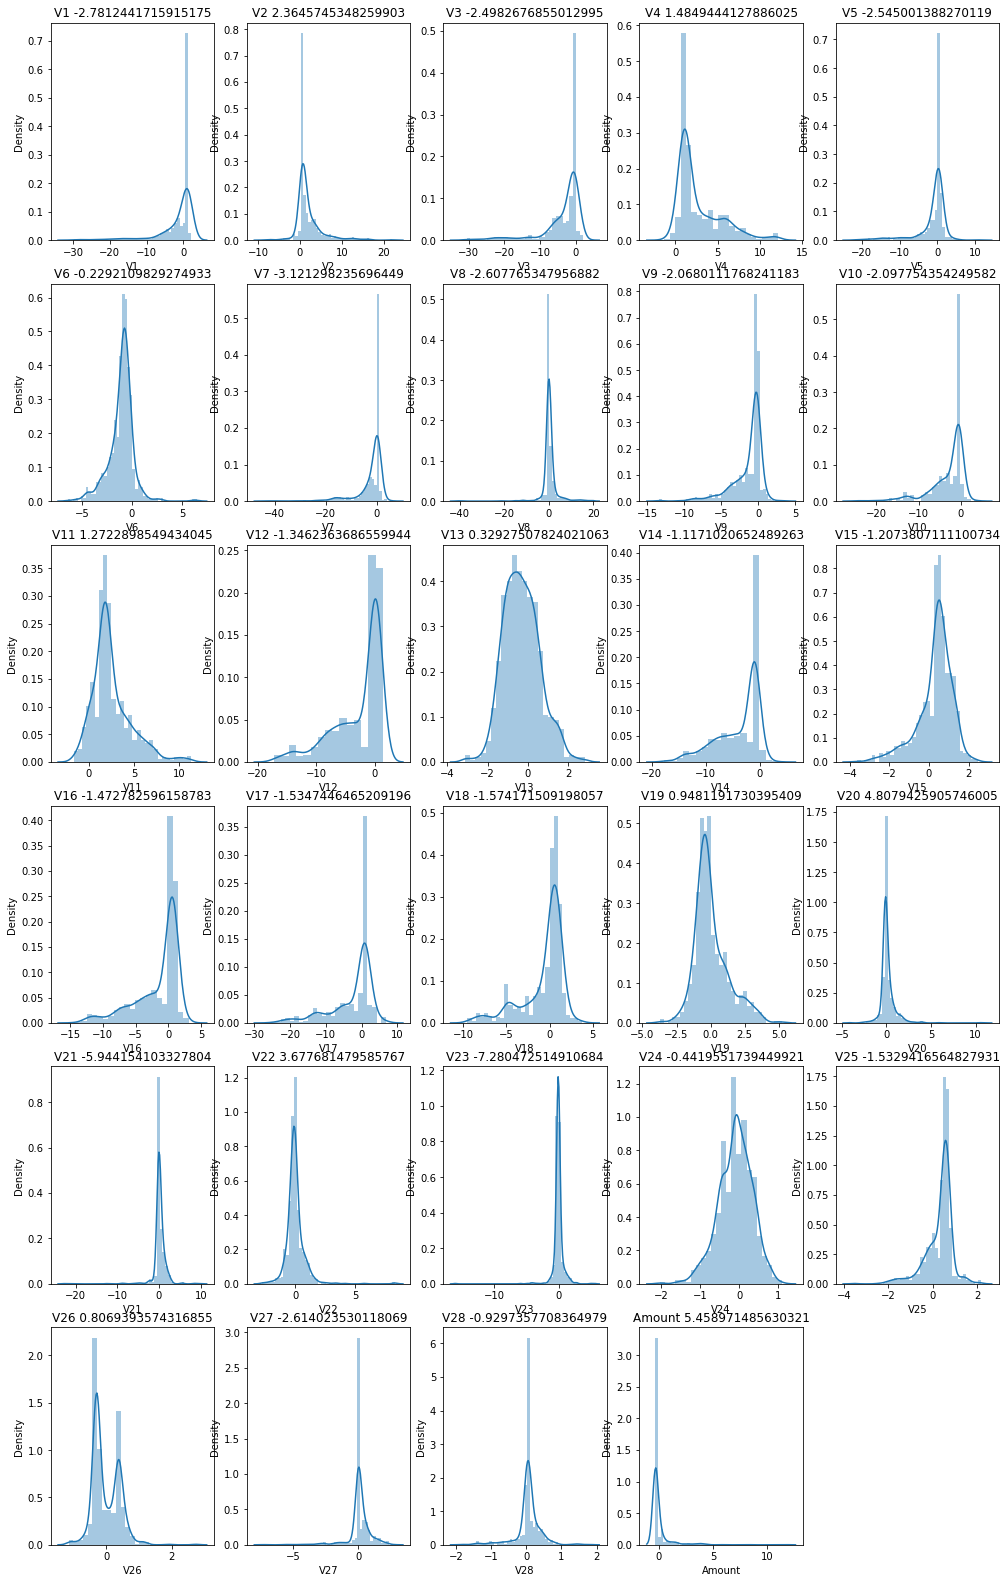

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

<b>Mitigate skweness with PowerTransformer</b>

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [ ]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

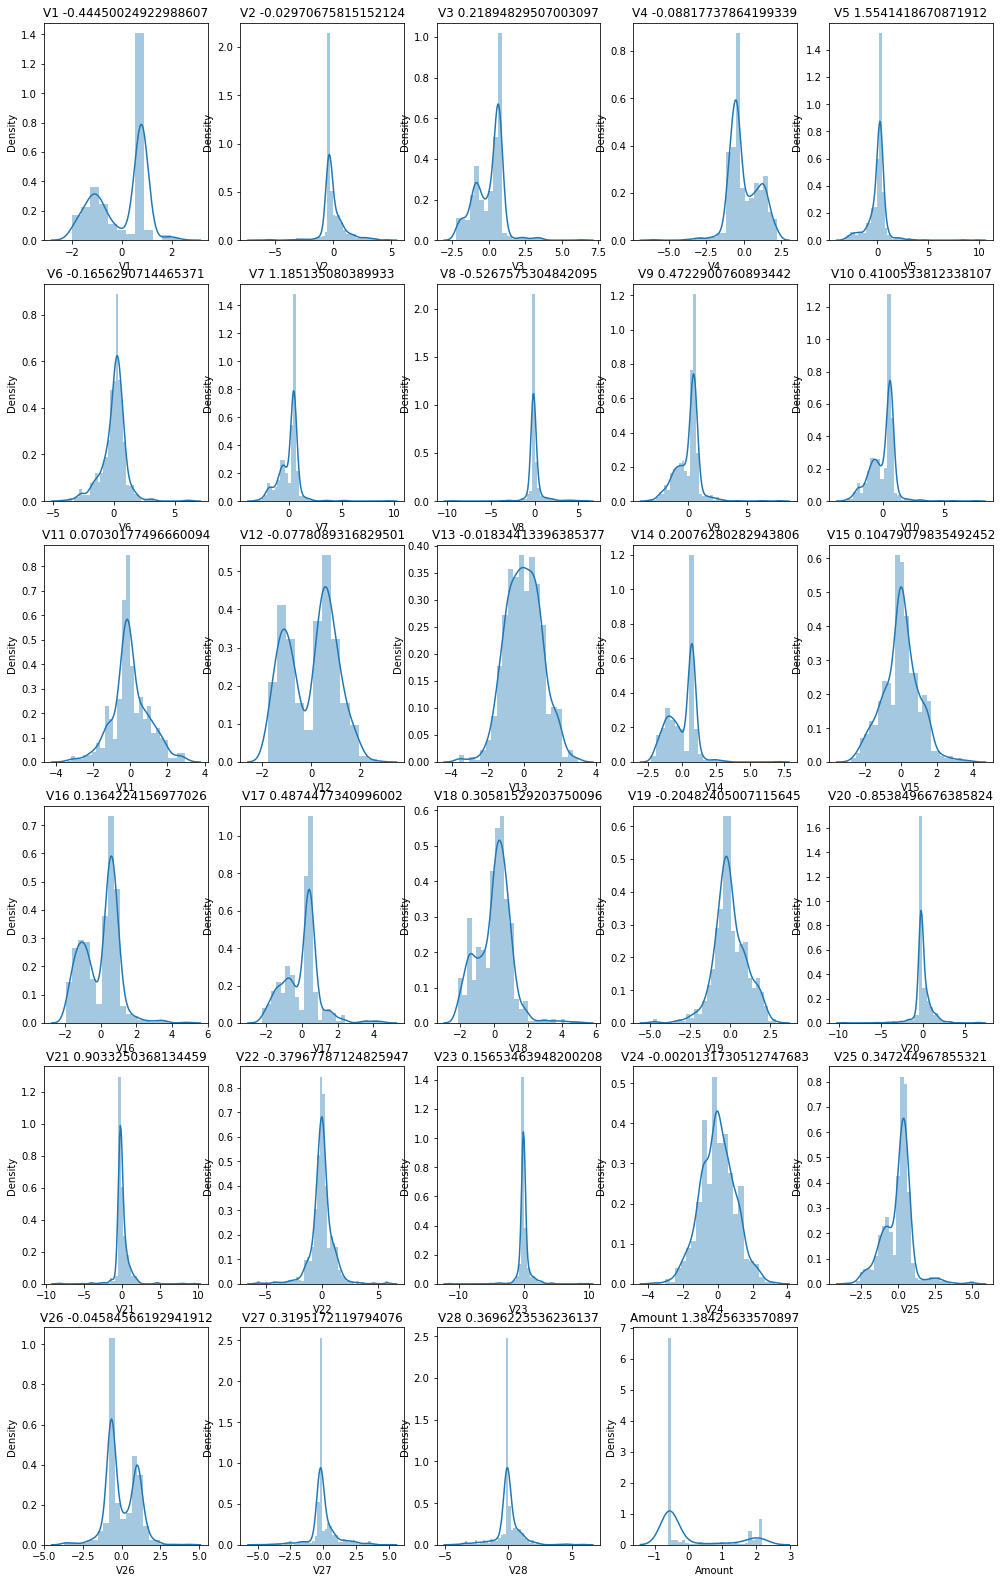

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

# Building machine learning models

# LOGISTIC REGRESSION

In [ ]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [ ]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Hyper parameter tuning for logistic regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.082523,0.147377,0.013299,0.010921,0.01,{'C': 0.01},0.999640,1.000000,0.984087,0.971245,...,0.988001,0.010810,4,0.982438,0.986561,0.989267,0.992439,0.986779,0.987497,0.003303
1,0.012500,0.011693,0.009375,0.007654,0.1,{'C': 0.1},0.999820,1.000000,0.986076,0.976374,...,0.992454,0.009668,3,0.990857,0.991826,0.994684,0.996531,0.992049,0.993189,0.002097
2,0.015626,0.000003,0.009374,0.007654,1,{'C': 1},0.999820,1.000000,0.990778,0.977473,...,0.993614,0.008817,1,0.996508,0.996185,0.997806,0.998282,0.994842,0.996725,0.001223
3,0.028124,0.006248,0.003124,0.006248,10,{'C': 10},0.999279,0.999817,0.992224,0.976557,...,0.993576,0.008991,2,0.998429,0.998188,0.998247,0.999989,0.998153,0.998601,0.000700
4,0.049828,0.002791,0.004924,0.005725,100,{'C': 100},0.998018,1.000000,0.984087,0.962088,...,0.987582,0.013878,5,0.999604,0.998834,0.999355,1.000000,0.999336,0.999426,0.000381
5,0.050081,0.011671,0.009376,0.007655,1000,{'C': 1000},0.996036,1.000000,0.971429,0.957692,...,0.980153,0.015795,6,0.999785,0.999604,0.999785,1.000000,0.999662,0.999767,0.000136


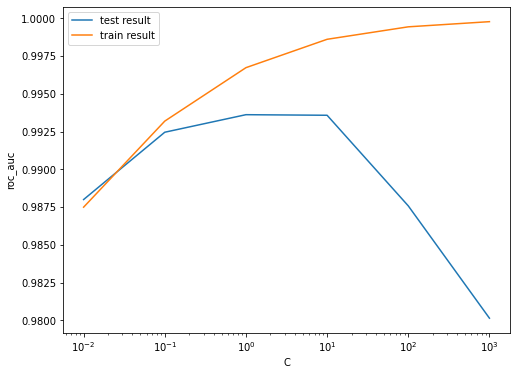

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9936139848291747 at C = 1


<b>Logistic regression with optimal C<b>

In [ ]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [ ]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

<b>Prediction on the train set<b>

In [ ]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[367   0]
 [ 44 333]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9408602150537635
Sensitivity:- 0.883289124668435
Specificity:- 1.0
F1-Score:- 0.9380281690140845


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       367
         1.0       1.00      0.88      0.94       377

    accuracy                           0.94       744
   macro avg       0.95      0.94      0.94       744
weighted avg       0.95      0.94      0.94       744



ROC on the train set

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

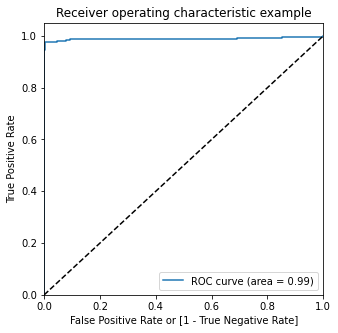

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.98 on the train set.

<b>Prediction on the test set</b>

In [ ]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[98  0]
 [ 4 84]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.978494623655914
Sensitivity:- 0.9545454545454546
Specificity:- 1.0
F1-Score:- 0.9767441860465117


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        98
         1.0       1.00      0.95      0.98        88

    accuracy                           0.98       186
   macro avg       0.98      0.98      0.98       186
weighted avg       0.98      0.98      0.98       186



ROC on the test set

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

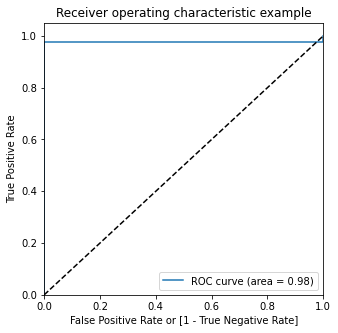

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

<b>Model summary</b><br>

<b>Train set</b><br>
Accuracy = 0.94<br>
Sensitivity = 0.88<br>
Specificity = 1.0<br>
F1-Score = 0.93<br>
ROC = 0.99<br>

<b>Test set</b><br>
Accuracy = 0.97<br>
Sensitivity = 0.95<br>
Specificity = 1.0<br>
F1-Score = 0.97<br>
ROC = 0.98<br>

Overall, the model is performing well in the test set.

# XGBoost

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier

# Hyperparameter Tuning for xgboost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train,eval_metric='logloss')

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.380220,0.129521,0.020621,7.518459e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.994926,0.999805,0.991707,0.995479,0.003329,1,1.0,0.999984,1.0,0.999995,7.665737e-06
1,0.307283,0.007364,0.015625,3.893359e-07,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.987510,0.999805,0.992260,0.993192,0.005062,6,1.0,1.000000,1.0,1.000000,6.409876e-17
2,0.351635,0.009689,0.010415,7.364797e-03,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.989722,0.998959,0.992390,0.993690,0.003882,5,1.0,1.000000,1.0,1.000000,0.000000e+00
3,0.312491,0.012757,0.015625,3.893359e-07,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.996357,0.993755,0.991902,0.994005,0.001827,3,1.0,0.999837,1.0,0.999946,7.665737e-05
4,0.333324,0.007367,0.010415,7.364853e-03,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.990177,0.999219,0.993008,0.994135,0.003777,2,1.0,1.000000,1.0,1.000000,0.000000e+00
5,0.291657,0.014730,0.015625,1.123916e-06,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.988616,0.999349,0.993724,0.993896,0.004384,4,1.0,1.000000,1.0,1.000000,0.000000e+00


<b>Model with optimal hyperparameters</b>

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[15:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<b> Prediction on train data </b>

In [ ]:
y_train_pred = xgb_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[367   0]
 [  0 377]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       367
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744



In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

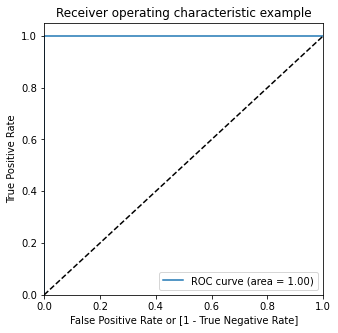

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

<b>Prediction on the test set</b>

In [ ]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[98  0]
 [ 0 88]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        98
         1.0       1.00      1.00      1.00        88

    accuracy                           1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

1.0

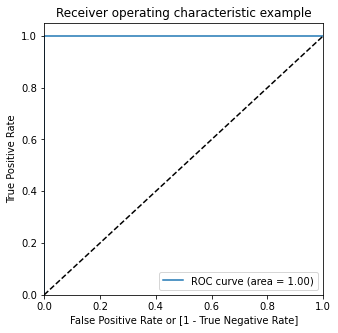

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model summary</b>

<b>Train set</b><br>
Accuracy = 1.0<br>
Sensitivity = 1.0<br>
Specificity = 1.0<br>
ROC-AUC = 1.0<br>
F1-Score =1.0<br>

<b>Test set</b><br>
Accuracy = 1.0<br>
Sensitivity = 1.0<br>
Specificity = 1.0<br>
ROC-AUC = 1.0<br>
F-Score = 1.0<br>

Overall, the model is performing well in the test set.

# Decision Tree

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Hyper parameter tuning for decision tree

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.091804,0.124917,0.006983,0.006279,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.968644,0.981232,0.986276,0.978718,0.007415,3
1,0.005662,0.000471,0.003332,0.000472,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.968644,0.983249,0.986276,0.979390,0.007698,1
2,0.001666,0.002356,0.006208,0.006772,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.957227,0.958203,0.979967,0.965133,0.010497,5
3,0.000000,0.000000,0.005210,0.007367,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.957227,0.958203,0.979967,0.965133,0.010497,5
4,0.005208,0.007365,0.005209,0.007366,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.968644,0.981427,0.986276,0.978783,0.007437,2
5,0.010416,0.007365,0.000000,0.000000,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.968644,0.976288,0.986276,0.977070,0.007219,4
6,0.000000,0.000000,0.010416,0.007365,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.957227,0.958203,0.979967,0.965133,0.010497,5
7,0.005208,0.007365,0.000000,0.000000,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.957227,0.958203,0.979967,0.965133,0.010497,5


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9793898250223719
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


<b>Model with optimal hyperparameters</b>

In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)
dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

<b>Prediction on the train set</b>

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[367   0]
 [  0 377]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9475806451612904
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.9456066945606694


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       367
         1.0       1.00      0.90      0.95       377

    accuracy                           0.95       744
   macro avg       0.95      0.95      0.95       744
weighted avg       0.95      0.95      0.95       744



In [ ]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9850714445753439

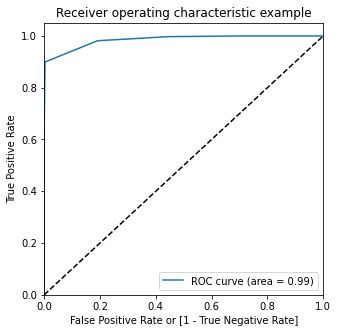

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

<b>Prediction on the test set</b>

In [ ]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[98  0]
 [ 4 84]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.978494623655914
Sensitivity:- 0.9545454545454546
Specificity:- 1.0
F1-Score:- 0.9456066945606694


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        98
         1.0       1.00      0.95      0.98        88

    accuracy                           0.98       186
   macro avg       0.98      0.98      0.98       186
weighted avg       0.98      0.98      0.98       186



In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9958256029684601

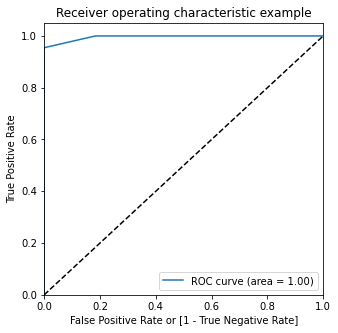

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model summary</b><br>

<b>Train set</b><br>
Accuracy = 0.94<br>
Sensitivity = 1.0<br>
Specificity = 1.0<br>
F1-Score = 0.94<br>
ROC-AUC = 0.99<br>

<b>Test set</b><br>
Accuracy = 0.97<br>
Sensitivity = 0.95<br>
Specificity = 1.0<br>
F-1 Score = 0.94<br>
ROC-AUC = 1.0<br>

Here sensitivity have decresed in test data comapred to train data.

# Random forest

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning for Random forest

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9663978494623656 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


<b>Model with optimal hyperparameters</b>

In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

<b>Prediction on the train set</b>

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[367   0]
 [  0 377]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9744623655913979
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.9742198100407056


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       367
         1.0       1.00      0.95      0.97       377

    accuracy                           0.97       744
   macro avg       0.98      0.97      0.97       744
weighted avg       0.98      0.97      0.97       744



In [ ]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9983593405560895

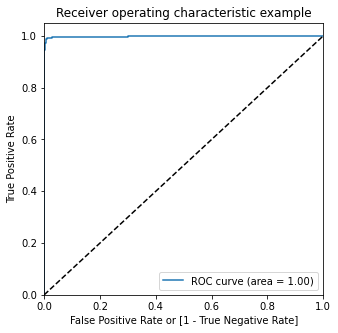

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

<b>Prediction on the test set</b>

In [ ]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[98  0]
 [ 2 86]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.989247311827957
Sensitivity:- 0.9772727272727273
Specificity:- 1.0
F1-Score:- 0.9742198100407056


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        98
         1.0       1.00      0.98      0.99        88

    accuracy                           0.99       186
   macro avg       0.99      0.99      0.99       186
weighted avg       0.99      0.99      0.99       186



In [ ]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

1.0

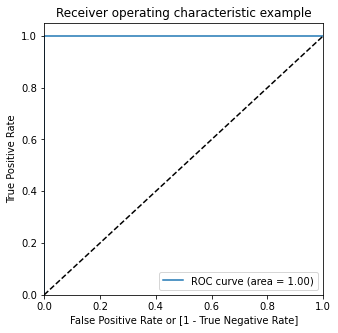

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model summary</b><br>

<b>Train set</b><br>
Accuracy = 0.97<br>
Sensitivity = 1.0<br>
Specificity = 1.0<br>
F1-Score = 0.97<br>
ROC-AUC = 1.0<br>

<b>Test set</b><br>
Accuracy = 0.98<br>
Sensitivity = 0.97<br>
Specificity = 1.0<br>
F-1 Score = 0.97<br>
ROC-AUC = 1.0<br>

Here sensitivity have decreased in test data compared to train data  


We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically  XGBoost have outperformed al, other algorithms.